# Shop Customer - Regression

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to predict the spending score with the Age, Sex and Annual Income. I will try different regression model and compare their performance.

*Import the most important libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [2]:
dataset = pd.read_csv('Customers.csv')
dataset.drop(columns=['CustomerID'], inplace=True)
dataset.sort_values(by='Age')

,Genre,Age,Annual_Income_(k$),Spending_Score
114,Female,18,65,48
91,Male,18,59,41
65,Male,18,48,59
33,Male,18,33,92
0,Male,19,15,39
...,...,...,...,...
90,Female,68,59,55
108,Male,68,63,43
57,Male,69,44,46
70,Male,70,49,55


## Linear Regression

Data-preprocessing: selecting the Genre, Age and Annual Income as independent variables X and the Spending Score as dependent variable y.

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Encode the categorical data of the Genre column, which has 'Female' and 'Male' as values. To avoid the dummy variable trap the first column of the transformed X is omitted. 

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]

Splitting the dataset into a training set and test set. The test set will contain 40 values and the training set 160.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the **Multiple Linear Regression** model on the training set. 

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the results of the test set.

In [7]:
y_pred = regressor.predict(X_test)

Checking R-squared: 

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.15451964144097086

The R-squared is at around 15.45 % which means that only 15.45 % of the Spending Score can be explained through the independent variables. From the plotting of the data in the clustering before this is a expected outcome because there was no linear correlation visible. 

In [9]:
import statsmodels.api as sm
X_sm = np.column_stack((X[:, 0].astype('int'), dataset['Age'], dataset['Annual_Income_(k$)']))
y_sm = dataset['Spending_Score']

X_sm = sm.add_constant(X_sm)
model = sm.OLS(y_sm, X_sm)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           4.91e-05
Time:                        19:39:17   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9300      6.642     11.130      0.0

x1 corresponds with the Genre, x2 with the Age and x3 with the Annual Income. The very large p-values of the first and third coefficient indicate that they are not statistically significant. The R-squared is at 10.9 % and the adjusted R-squared at 9.5 %. The difference of the R-squared from the model built with the scikitlearn LinearRegression could be explained by the random train-test-set-splits. The F-statistic, which is not that much greater than 1 at 7.960 indicated that there is not a very strong relationship between the dependent and independent variables. 

In [10]:
X_sm = dataset['Age']
y_sm = dataset['Spending_Score']

X_sm = sm.add_constant(X_sm)
model = sm.OLS(y_sm, X_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           2.25e-06
Time:                        19:39:17   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7012      5.124     14.384      0.0

By removing the first and third coefficient the R-squared has fallen to 10.7 % but the adjusted R-squared has risen to 10.3 %. 

Visualizing the result with only the Age as independent variable: 

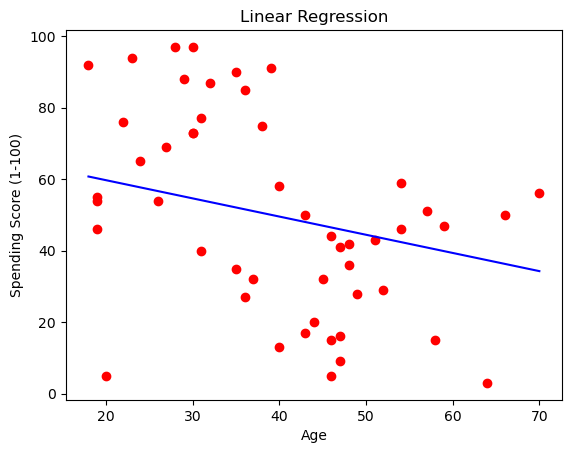

0.16234551564197253

In [11]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# create new DataFrame to sort the data 
df_visual = pd.DataFrame(X_test)
df_visual.insert(1, value=regressor.predict(X_test), column=1)
df_visual.sort_values(0, inplace=True)

plt.scatter(X_test, y_test, color='red')
plt.plot(df_visual[0], df_visual[1], color='blue')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

r2_score(y_test, regressor.predict(X_test))

Here it's visible why only around 16.23 % of the Spending Score can be explained through the Age with a Linear Regression. This model only allows a linear function which can be moved and be rotated but not bend to fit the data. The slightly improvement results from a different split of the dataset. 

## Polynominal Regression

Because the Age seemed to be the only statistically significant variable I will only use this coefficient moving forward. This will also allow be to visualize the results. 

In [12]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Create a matrix of the powered feature:

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))


Train the model with the powered feature: 

In [14]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

Predicting the results: 

In [15]:
y_pred = poly_reg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.16422266633809135

Displaying the results:

In [16]:
# create new DataFrame to sort the data 
df_visual = pd.DataFrame(np.array(X_test))
df_visual.insert(1, value=y_pred, column=1)
df_visual.sort_values(0, inplace=True)
df_visual.head()

,0,1
16,18,61.115250
33,19,60.560348
43,19,60.560348
10,19,60.560348
40,20,60.007350


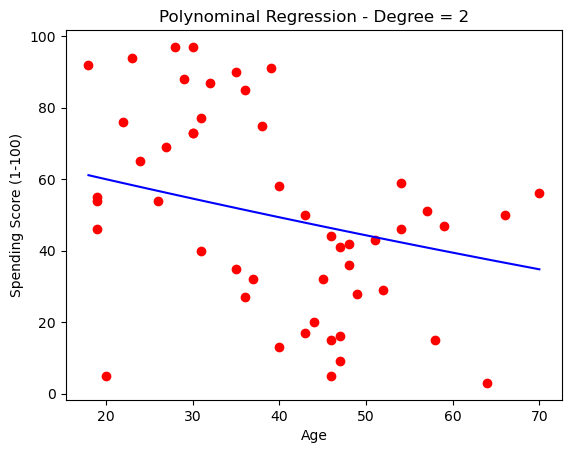

In [17]:
plt.scatter(X_test, y_test, color='red')
plt.plot(df_visual[0], df_visual[1], color='blue')
plt.title('Polynominal Regression - Degree = 2')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

This looks very similar to the Linear Regression, when using only 2 degrees for the Polynominal Regression. The R-squared therefore has a very similar value with 16.42 %. 

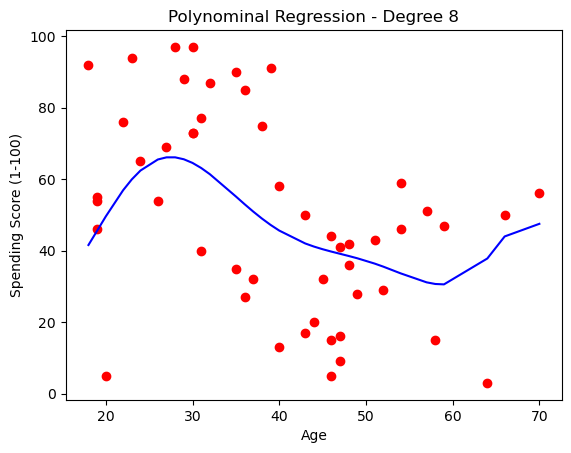

0.31067314496045084

In [18]:
poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

y_pred = poly_reg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

# create new DataFrame to sort the data 
df_visual = pd.DataFrame(np.array(X_test))
df_visual.insert(1, value=y_pred, column=1)
df_visual.sort_values(0, inplace=True)

plt.scatter(X_test, y_test, color='red')
plt.plot(df_visual[0], df_visual[1], color='blue')
plt.title('Polynominal Regression - Degree 8')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

r2_score(y_test, y_pred)

With 8 degrees the Polynominal Regression allows a better fit of the function to the distribution of data points. Therefore the R-squared has nearly doubled to 31.06 %, which means that 31.06 % of the variance of the Spending Score can be explained by the Age using a polynominal function. 

## Support Vector Regression (SVR)

## Decision Tree Regression 

## Random Forest Regression 

## **Comparison**